C:\Users\dhruvi\AppData\Local\Temp\ipykernel_16424\1629079164.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\dhruvi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3078/3078 ━━━━━━━━━━━━━━━━━━━━ 158s 49ms/step - loss: 0.0026


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


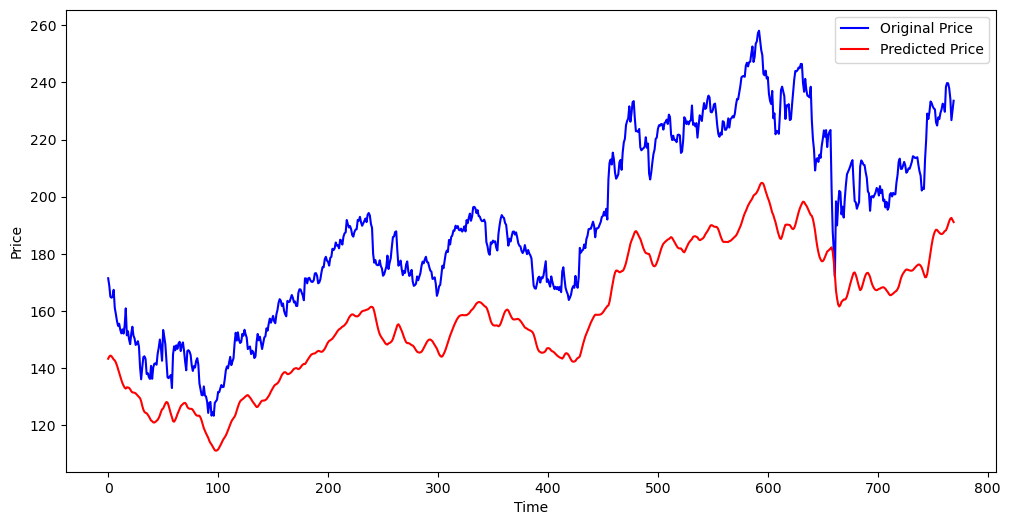

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Download data
start = '2010-01-01'
end = '2025-09-13'  # Updated to current date
df = yf.download('AAPL', start=start, end=end)

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training data
time_step = 100
X, y = [], []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Save model
model.save('stock_model.h5')

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.T, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\dhruvi\AppData\Local\Temp\ipykernel_1952\2826230638.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.424605  6.439315  6.375672  6.407193  493729600
2010-01-05  6.435713  6.472037  6.401790  6.442317  601904800
2010-01-06  6.333344  6.461230  6.326740  6.435713  552160000
2010-01-07  6.321637  6.364266  6.275707  6.356761  477131200
2010-01-08  6.363665  6.364265  6.276007  6.313231  447610800


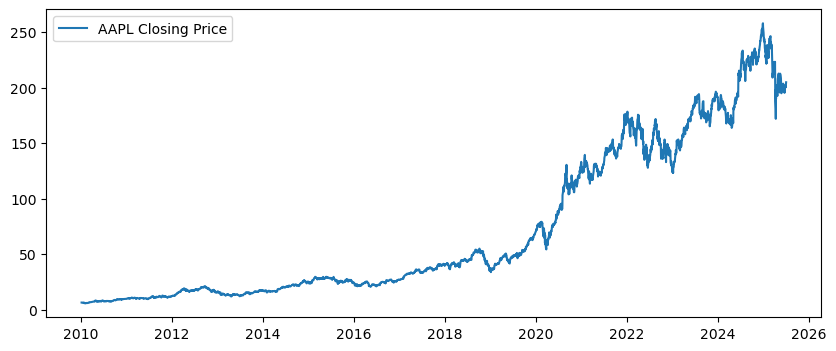

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define time range
start = '2010-01-01'
end = '2025-07-01'

# Download stock data (Apple in this case)
df = yf.download('AAPL', start=start, end=end)

print(df.head())

# Optional: plot closing price
plt.figure(figsize=(10,4))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.legend()
plt.show()

In [18]:
df.tail

<bound method NDFrame.tail of Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2010-01-04    6.424605    7.643214    7.660714    7.585000    7.622500   
2010-01-05    6.435713    7.656429    7.699643    7.616071    7.664286   
2010-01-06    6.333344    7.534643    7.686786    7.526786    7.656429   
2010-01-07    6.321637    7.520714    7.571429    7.466071    7.562500   
2010-01-08    6.363665    7.570714    7.571429    7.466429    7.510714   
...                ...         ...         ...         ...         ...   
2025-06-24  200.072937  200.300003  203.440002  200.199997  202.589996   
2025-06-25  201.331512  201.559998  203.669998  200.619995  201.449997   
2025-06-26  200.772141  201.000000  202.639999  199.460007  201.429993   
2025-06-27  200.852051  201.080002  203.220001  200.000000  201.889999   
2025-06-

In [20]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.424605,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.435713,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.333344,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.321637,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.363665,7.570714,7.571429,7.466429,7.510714,447610800


In [24]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\dhruvi\AppData\Local\Temp\ipykernel_1952\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


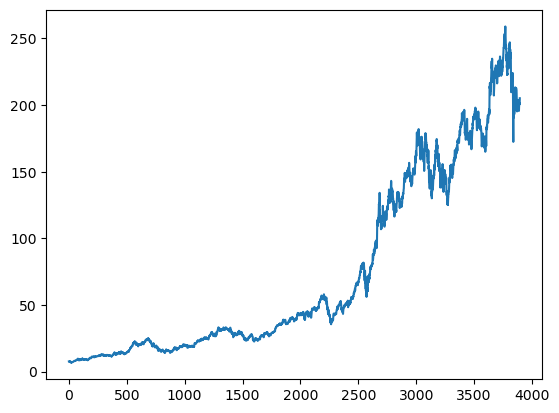

In [26]:
plt.plot(df.Close)

In [28]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...
3891,200.300003,203.440002,200.199997,202.589996,54064000
3892,201.559998,203.669998,200.619995,201.449997,39525700
3893,201.000000,202.639999,199.460007,201.429993,50799100


In [32]:
ma100 = df.Close.rolling(100).mean()
ma100 

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3891,213.9419
3892,213.5816
3893,213.2316
3894,212.9623


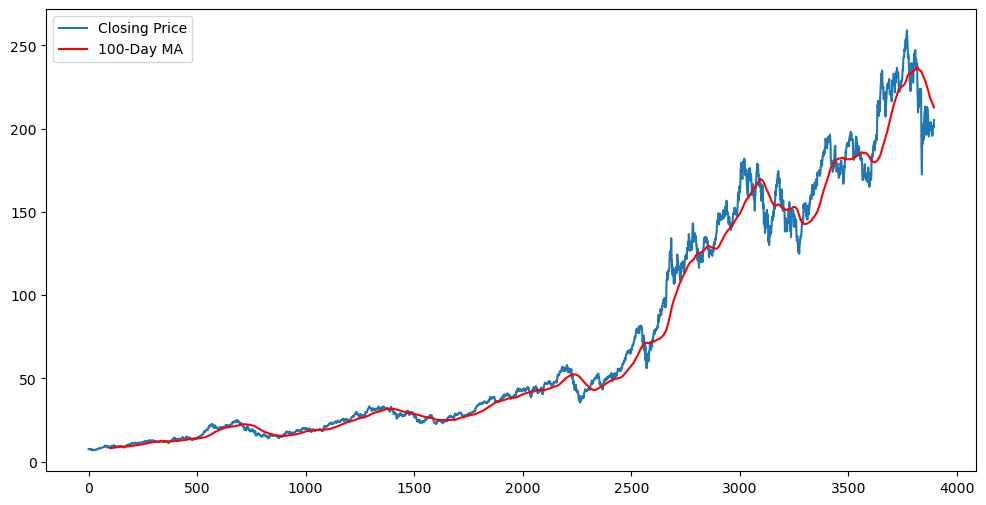

In [36]:
import matplotlib.pyplot as plt

# Calculate 100-day moving average
ma100 = df['Close'].rolling(100).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.legend()
plt.show()


In [38]:
ma200 = df.Close.rolling(200).mean()
ma200 

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3891,223.63580
3892,223.53170
3893,223.43260
3894,223.33345


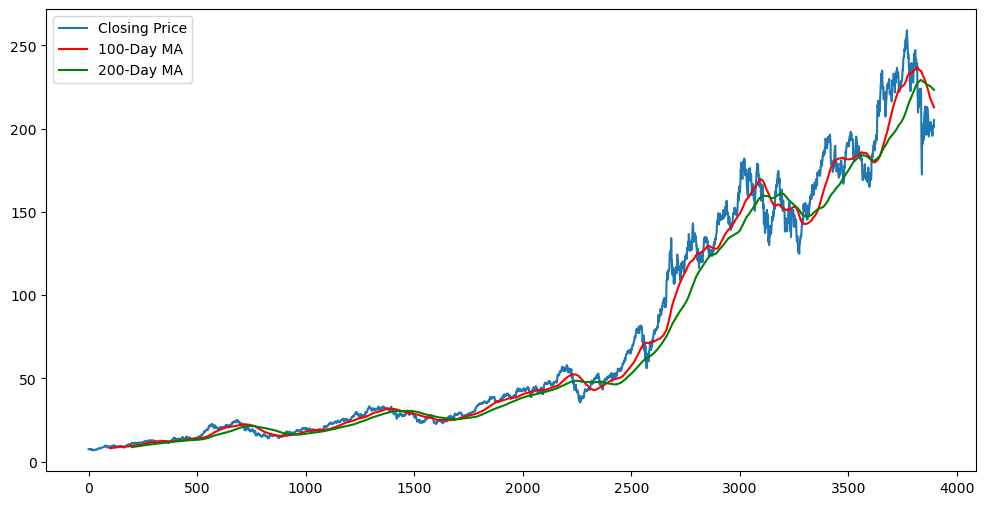

In [40]:
# Calculate 100-day moving average
ma100 = df['Close'].rolling(100).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.plot(ma200, 'g', label='200-Day MA')
plt.legend()
plt.show()


In [42]:
df.shape

(3896, 5)

In [46]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2727, 1)
(1169, 1)


In [48]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [50]:
data_testing.head()

Ticker,AAPL
2727,108.769997
2728,110.440002
2729,114.949997
2730,119.029999
2731,118.690002


In [52]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [54]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0061599 ],
       [0.00626369],
       [0.00530717],
       ...,
       [0.81951144],
       [0.8518706 ],
       [0.80113273]])

In [56]:
data_training_array.shape 

(2727, 1)

In [60]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [62]:
x_train.shape

(2627, 100, 1)

In [64]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

model = Sequential()

# Input Layer
model.add(Input(shape=(x_train.shape[1], 1)))

# First LSTM
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))


In [76]:
model.summary 

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [78]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 227ms/step - loss: 0.0218
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - loss: 0.0029
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - loss: 0.0022
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - loss: 0.0034
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - loss: 0.0019
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0019
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - loss: 0.0019
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - loss: 0.0018
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - loss: 0.0014
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - loss: 0.0015
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - loss: 0.0015
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - loss: 0.0019
Epoch 13/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - loss: 0.0017
Epoch 14/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - loss: 0.0014
Epoch 15/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [81]:
model.save("keras_model.keras")

In [83]:
data_testing.head()

Ticker,AAPL
2727,108.769997
2728,110.440002
2729,114.949997
2730,119.029999
2731,118.690002


In [85]:
data_testing.tail(100)

Ticker,AAPL
3796,232.470001
3797,233.220001
3798,227.630005
3799,227.649994
3800,232.619995
...,...
3891,200.300003
3892,201.559998
3893,201.000000
3894,201.080002


In [87]:
past_100_days = data_training.tail(100)

In [93]:
# Take last 100 days from training set
past_100days = data_training.tail(100)

# Combine with testing set
final_df = pd.concat([past_100days, data_testing], ignore_index=True)

print(final_df.shape)


(1269, 1)


In [95]:
final_df.head()

Ticker,AAPL
0,83.974998
1,84.699997
2,85.747498
3,88.019997
4,87.897499


In [99]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.        ],
       [0.00414178],
       [0.01012596],
       ...,
       [0.66854242],
       [0.66899946],
       [0.69236486]])

In [101]:
input_data.shape

(1269, 1)

In [103]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [105]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1169, 100, 1)
(1169,)


#MAKING PREDICTIONS

In [108]:
y_predicted = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step


In [109]:
y_predicted.shape

(1169, 1)

In [110]:
y_test

array([0.14164929, 0.15118972, 0.1769545 , ..., 0.66854242, 0.66899946,
       0.69236486])

In [111]:
y_predicted

array([[0.18769383],
       [0.18661898],
       [0.18530877],
       ...,
       [0.59382623],
       [0.5965142 ],
       [0.5998048 ]], dtype=float32)

In [116]:
scaler.scale_

array([0.00571282])

In [122]:
scale_factor = 1/0.00571282
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


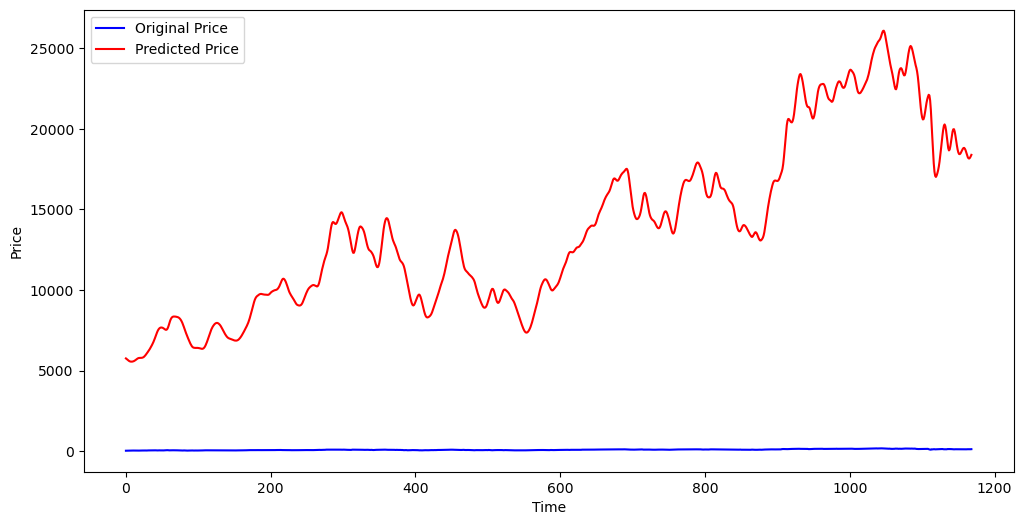

In [124]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()